In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load train dataset
df_train = pd.read_csv("train.csv", delimiter=',')

# Shuffle dataset

# Drop Ticket Column
df_train.drop("Ticket", axis=1, inplace=True)

# Pop Passenger ID and Name
df_train.drop(["PassengerId", "Name"], axis=1, inplace=True)

# Drop Cabin columns, temporary
df_train.drop("Cabin", axis=1, inplace=True)

df_train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [3]:
# Pre Processing
# Map sex to binary
df_train["Sex"] = df_train["Sex"].map({"male": 0, "female": 1})

# Map Embarked
df_train["Embarked"] = df_train["Embarked"].map({"S": 0, "C": 1, "Q": 2})

df_train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0


In [4]:
# Check NaN per column
df_train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [5]:
# Pre-training processing
x_train, y_train = df_train.iloc[:, 1:], df_train.iloc[:, 0]

y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [6]:
from classification.decision_tree import DecisionTreeClassifier

# Decision Tree
dt = DecisionTreeClassifier(x_train.values, y_train.values, feature_names=list(x_train.columns), class_names={1: "survived", 0: "dead"})

# Train
dt.train(max_depth=2)

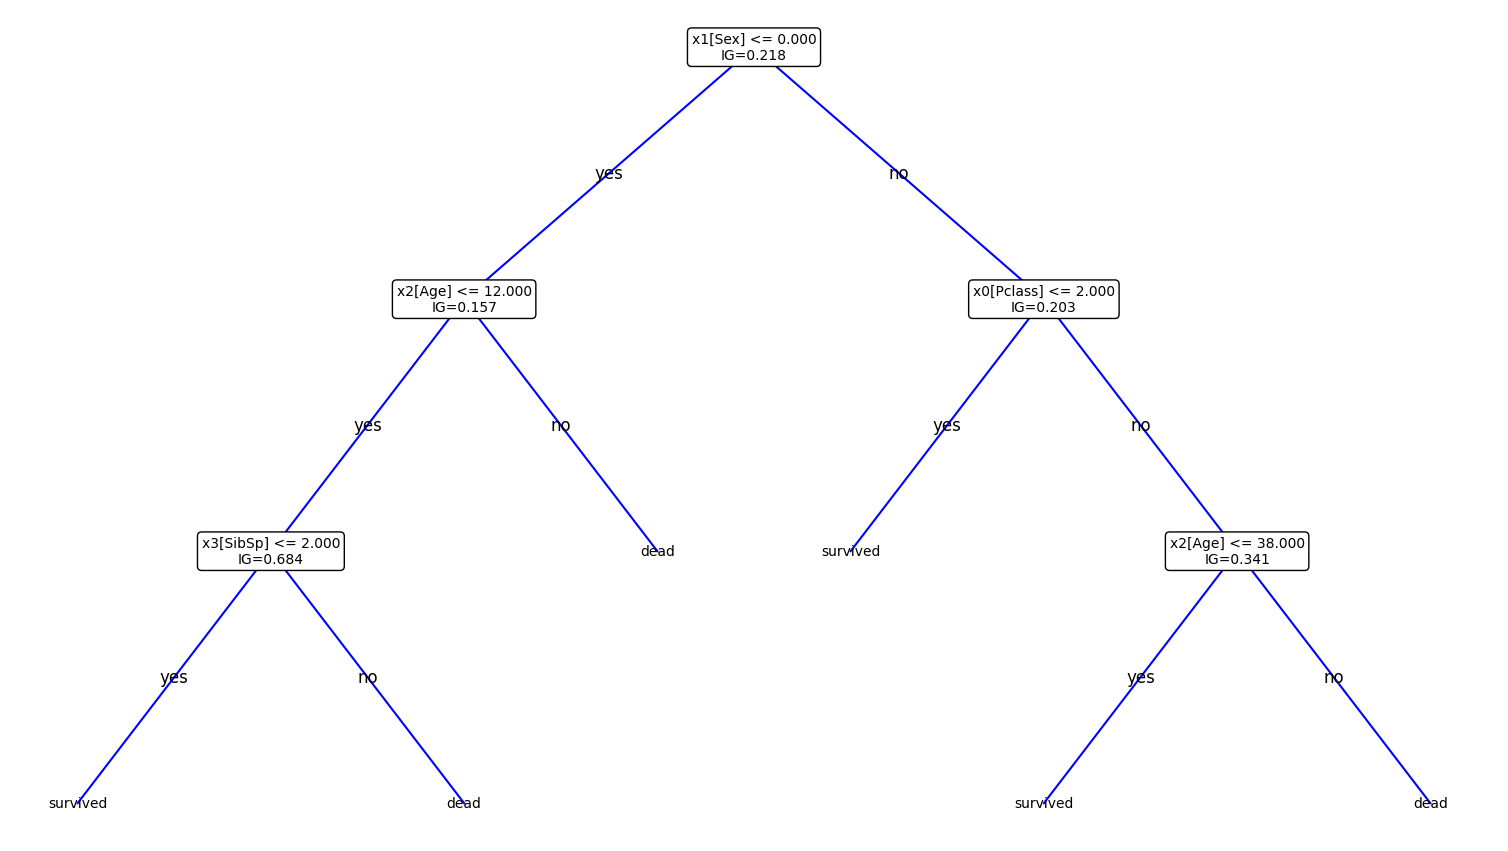

In [7]:
# Print Decision Tree
dt.plot_tree()

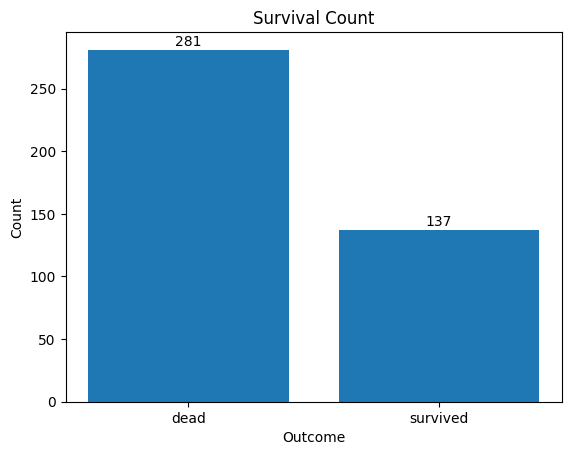

In [8]:
import numpy as np

# Predict
# Load test dataset
df_test = pd.read_csv("test.csv", delimiter=',')

# Drop Ticket Column
df_test.drop("Ticket", axis=1, inplace=True)

# Pop Passenger ID and Name
info_df = df_test["PassengerId"]
df_test.drop(["PassengerId", "Name"], axis=1, inplace=True)

# Drop Cabin columns, temporary
df_test.drop("Cabin", axis=1, inplace=True)

# Pre Processing
# Map sex to binary
df_test["Sex"] = df_test["Sex"].map({"male": 0, "female": 1})

# Map Embarked
df_test["Embarked"] = df_test["Embarked"].map({"S": 0, "C": 1, "Q": 2})

# Predict
y_test = dt.predict(df_test.values)

# Plot result
# Map the values in the array to strings
labels = np.vectorize(lambda x: "dead" if not x else "survived")(y_test)

# Create the bar plot
unique, counts = np.unique(labels, return_counts=True)
plt.bar(unique, counts)

# Add labels and title
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Survival Count')

# Add count text above each bar
for i, count in enumerate(counts):
    plt.text(i, count+1, str(count), ha='center', va='bottom')

# Display the plot
plt.show()

In [9]:
# Post process
df_pred = pd.DataFrame({"PassengerId": list(info_df.values), "Survived": y_test.astype(int)})

# Save to CSV
df_pred.to_csv("pred.csv", index=False)

df_pred.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
